In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display, HTML

df = pd.read_csv('abalone.csv', header=None)

In [2]:
df.columns=['Sex', 'Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.isnull().values.any()

False

# Reserach Question 
Can we predict the age of abalone by various measurements?

## Outcome variable

Our outcome variable is Rings. 

## Relevant data set information

Predicting the age of abalone from physical measurements.  The age of
abalone is determined by cutting the shell through the cone, staining it,
and counting the number of rings through a microscope -- a boring and
time-consuming task.  Other measurements, which are easier to obtain, are
used to predict the age.  Further information, such as weather patterns
and location (hence food availability) may be required to solve the problem.


## Univariate Variables Description

    Nine variables
    4,177 rows, which makes for 37,593 datapoints
    Eight continuous data points and one categorical data point(Gender)
    Length and Diameter variables are showing normal distributions with some negative skew and positive kurtosis.
    The variables involving weight are showing negative kurtosis and some positive skew.
    There are zero null values in this data set
    
## Bivariate Data Description
    Seeing strong positive correlations between diameter and length, whole weight and our our other variables.
    Shell Weight has the strongest correlation to our outcome variable.
    

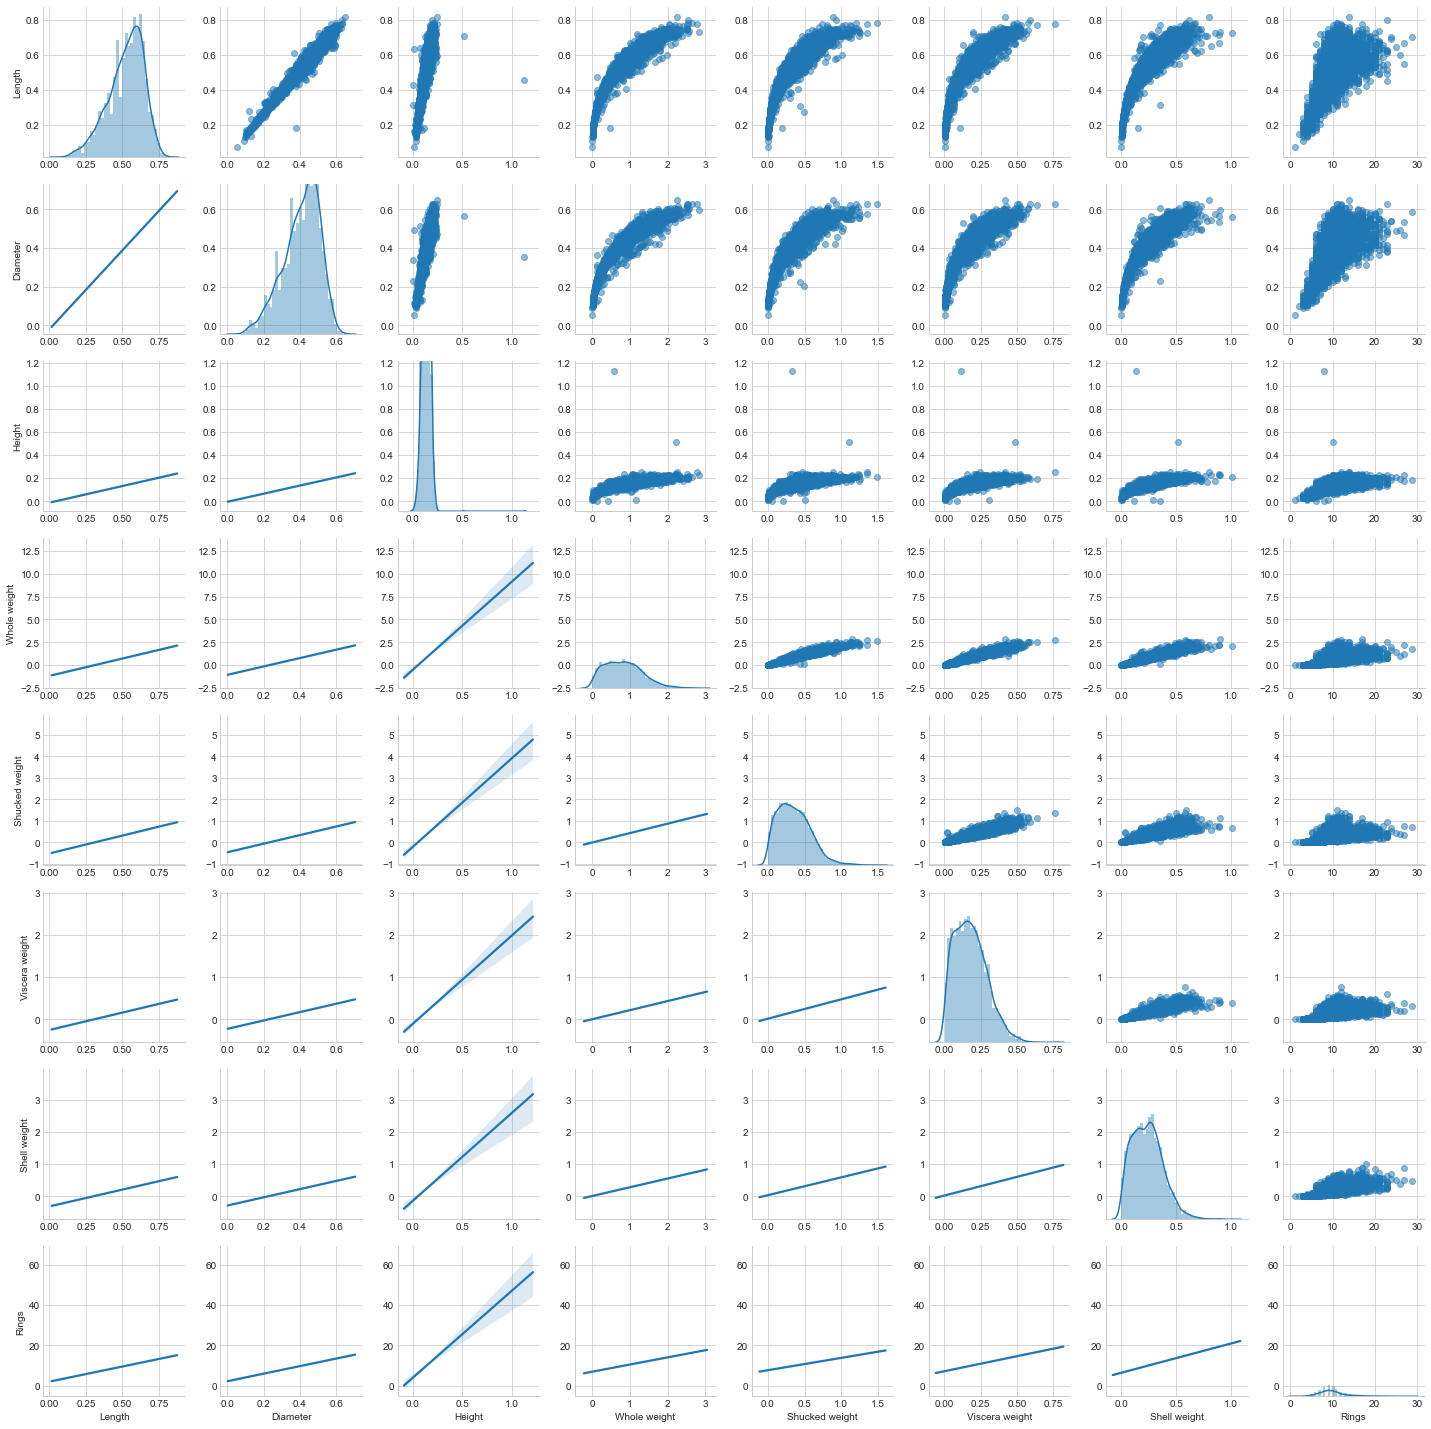

In [5]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.distplot)
plt.show()

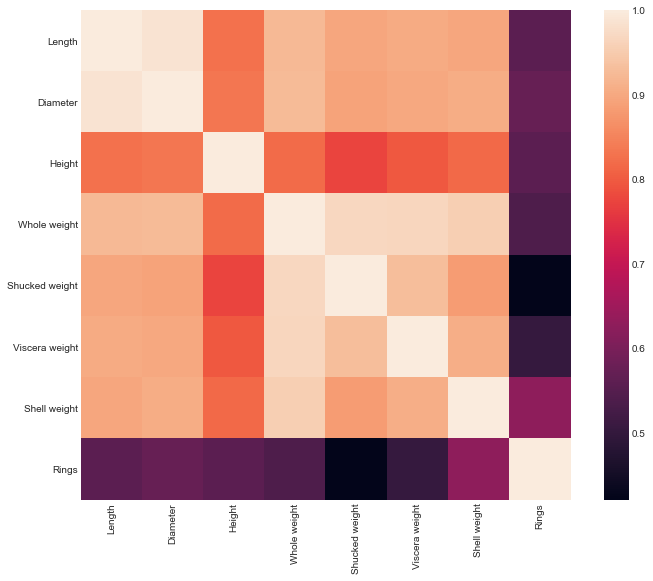

In [6]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)
plt.show()

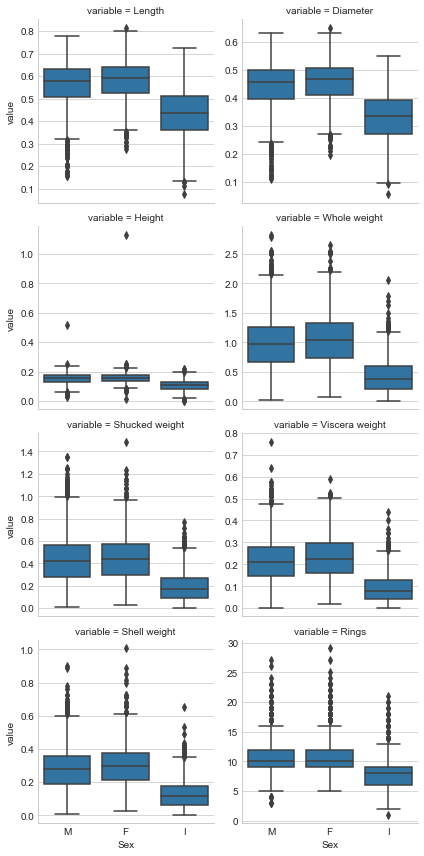



Doing a T-test for Male and Female (infant not calculated) 

Length
Ttest_indResult(statistic=-4.923512005809771, pvalue=8.9878749662128484e-07)
Diameter
Ttest_indResult(statistic=-5.223098609148165, pvalue=1.8870813991114302e-07)
Height
Ttest_indResult(statistic=-4.719855744510042, pvalue=2.4747246819378313e-06)
Whole weight
Ttest_indResult(statistic=-3.2305363465474559, pvalue=0.0012497207919589404)
Shucked weight
Ttest_indResult(statistic=-1.6568104751042234, pvalue=0.097668530790372785)
Viscera weight
Ttest_indResult(statistic=-3.9554409660514107, pvalue=7.8266280198103244e-05)
Shell weight
Ttest_indResult(statistic=-4.1403367704734766, pvalue=3.569237843097772e-05)
Rings
Ttest_indResult(statistic=-3.6729316538107608, pvalue=0.00024421940344108192)


In [7]:
df_melt = pd.melt(df, id_vars='Sex')

g = sns.FacetGrid(df_melt, col='variable', sharey=False, col_wrap=2)
g = g.map(sns.boxplot,'Sex', 'value')
plt.show()

#Descriptive statistics by Sex (female, male, infant)
newdf = df.groupby('Sex').describe()



#T-test for Female and Male

print('\n\nDoing a T-test for Male and Female (infant not calculated) \n')
for col in df.loc[:,'Length':'Rings']:
    print(col)
    print(stats.ttest_ind(
        df[df['Sex'] == 'M'][col].dropna(),
        df[df['Sex'] == 'F'][col].dropna()
    ))
    
HTML(newdf.to_html())


## Feature engineering

In this section where extracting four new features: age and gender features. We are also doing a Principal Component analysis to extract another feature.

In [8]:
#Creating age features, young is the bottom 25% of our Ring data, old is the top 25% of our ring data, 
#and middle aged is the middle 50% of our ring data
df['old']  = np.where(df['Rings'] >= 11, 1, 0)
df['young'] = np.where(df['Rings'] <= 8, 1, 0)
df['middle_aged'] = np.where(((df['Rings'] < 11) & (df['Rings'] > 8)), 1, 0)

#Creating numerical gender features
df['is_infant']  = np.where(df['Sex'] == 'I', 1, 0)
df['is_male']  = np.where(df['Sex'] == 'M', 1, 0)
df['is_female']  = np.where(df['Sex'] == 'F', 1, 0)

#Creating a size feature by averaging Height, Width, and Length 
df['size'] = (df['Diameter'] + df['Length'] + df['Height']) / 3


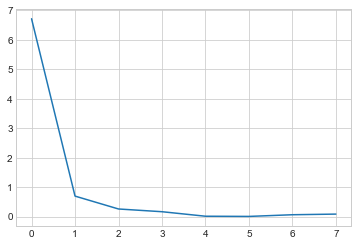

Components: [  8.39054894e-01   8.69516209e-02   3.23053901e-02   2.07487304e-02
   1.58677048e-03   7.99790556e-04   7.93409586e-03   1.06187080e-02]


In [9]:
#Principal Component analysis

#Preparing data set
pca_df = df.loc[:, 'Length':'Rings']
X = StandardScaler().fit_transform(pca_df)

#Transpose X for numpy covariance matrix function.
Xt = X.T
Cx = np.cov(Xt)

#Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

#Scree plot, Plotting eigenvalues to decide which components to keep
plt.plot(eig_val_cov)
plt.show()

#Calculating PCA components
print('Components:', eig_val_cov / sum(eig_val_cov))

In [12]:
#Keeping first component and calculating P & Y
P = eig_vec_cov[:, 1]
Y = P.T.dot(Xt)


df['PCA_component_feature'] = Y

In [13]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,old,young,middle_aged,is_infant,is_male,is_female,size,PCA_component_feature
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0,0,1,0,0.305000,-1.795655
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1,0,0,1,0,0.235000,0.092832
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0,1,0,0,1,0.361667,0.049407
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1,0,1,0,0.310000,-0.418640
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0,1,0,0,0.221667,0.065752
